In [1]:
!unzip "archive.zip"

Archive:  archive.zip
  inflating: Taxi_Trips_-_2024_20240408.csv  


✅ Data loaded successfully!
✅ Missing data handled.
✅ Categorical features encoded.
✅ Data split into training and testing sets.
✅ Model trained successfully.

--- Model Evaluation ---
R² Score: 0.5519
RMSE (Root Mean Squared Error): $27.88

📋 Sample Predictions:
   Actual Trip Total  Predicted Trip Total
0              20.25                 21.79
1              11.78                 11.73
2              57.50                 55.30
3              54.70                 24.59
4              39.68                 43.13
5              13.50                 10.08
6               9.00                  7.92
7              22.25                 17.63
8              61.80                 57.46
9              43.00                 48.84


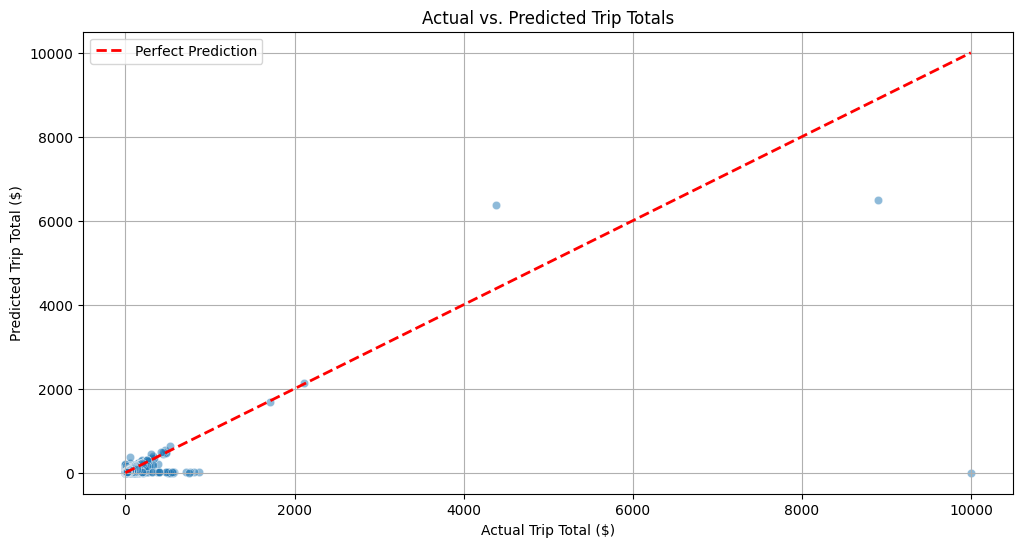

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# ========================
# 1️⃣ Load the Data
# ========================
# This line will now work because the CSV file has been unzipped.
df1 = pd.read_csv('/content/Taxi_Trips_-_2024_20240408.csv')
print("✅ Data loaded successfully!")

# ========================
# 2️⃣ Select Features and Target
# ========================
features = ['Trip Seconds', 'Trip Miles', 'Extras', 'Payment Type', 'Company']
target = 'Trip Total'
df1 = df1[features + [target]]

# ========================
# 3️⃣ Handle Missing Data
# ========================
df1 = df1.dropna(subset=[target])
df1['Trip Seconds'] = df1['Trip Seconds'].fillna(0)
df1['Trip Miles'] = df1['Trip Miles'].fillna(0)
df1['Extras'] = df1['Extras'].fillna(0)
df1['Payment Type'] = df1['Payment Type'].fillna('Unknown')
df1['Company'] = df1['Company'].fillna('Unknown')
print("✅ Missing data handled.")

# ========================
# 4️⃣ Encode Categorical Columns
# ========================
categorical_cols = ['Payment Type', 'Company']
# Using handle_unknown='ignore' is safer for real-world data
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df1[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols), index=df1.index)

# Combine with numeric features
X = pd.concat([df1[['Trip Seconds', 'Trip Miles', 'Extras']], encoded_df], axis=1)
y = df1[target]
print("✅ Categorical features encoded.")

# ========================
# 5️⃣ Train/Test Split
# ========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data split into training and testing sets.")

# ========================
# 6️⃣ Train Linear Regression Model
# ========================
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("✅ Model trained successfully.")

# ========================
# 7️⃣ Evaluate Model
# =_======================
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Model Evaluation ---")
print(f"R² Score: {r2:.4f}")
print(f"RMSE (Root Mean Squared Error): ${rmse:.2f}")

# ========================
# 8️⃣ Visualize Results
# ========================
comparison_df = pd.DataFrame({
    'Actual Trip Total': y_test.values[:10],
    'Predicted Trip Total': y_pred[:10].round(2)
}).reset_index(drop=True)

print("\n📋 Sample Predictions:")
print(comparison_df)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Prediction')
plt.title("Actual vs. Predicted Trip Totals")
plt.xlabel("Actual Trip Total ($)")
plt.ylabel("Predicted Trip Total ($)")
plt.legend()
plt.grid(True)
plt.show()